In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# read file

data = pd.read_csv('total-cases-covid-19_python.csv')
deaths = pd.read_csv('total-deaths-covid-19_python.csv')

In [15]:
Deaths_col = deaths['Total confirmed deaths due to COVID-19 (deaths)']
data['Deaths'] = Deaths_col
data.tail()

,Entity,Code,Date,Total confirmed cases of COVID-19 (cases),Deaths
8003,United Kingdom,GBR,"Mar 29, 2020",17089,1019
8004,United Kingdom,GBR,"Mar 30, 2020",19522,1228
8005,United Kingdom,GBR,"Mar 31, 2020",22141,1408
8006,United Kingdom,GBR,"Apr 1, 2020",25150,1789
8007,United Kingdom,GBR,"Apr 2, 2020",29474,2532


In [16]:
# filter uk only

data = data[data.Entity == 'United Kingdom']
data.tail()

,Entity,Code,Date,Total confirmed cases of COVID-19 (cases),Deaths
8003,United Kingdom,GBR,"Mar 29, 2020",17089,1019
8004,United Kingdom,GBR,"Mar 30, 2020",19522,1228
8005,United Kingdom,GBR,"Mar 31, 2020",22141,1408
8006,United Kingdom,GBR,"Apr 1, 2020",25150,1789
8007,United Kingdom,GBR,"Apr 2, 2020",29474,2532


In [17]:
# create new cases column

new_cases = data['Total confirmed cases of COVID-19 (cases)'].diff()
new_deaths = data['Deaths'].diff()

In [18]:
# join with dataframe

data['new_cases'] = new_cases
data['Deaths'] = new_deaths
data.tail()

,Entity,Code,Date,Total confirmed cases of COVID-19 (cases),Deaths,new_cases
8003,United Kingdom,GBR,"Mar 29, 2020",17089,260.0,2546.0
8004,United Kingdom,GBR,"Mar 30, 2020",19522,209.0,2433.0
8005,United Kingdom,GBR,"Mar 31, 2020",22141,180.0,2619.0
8006,United Kingdom,GBR,"Apr 1, 2020",25150,381.0,3009.0
8007,United Kingdom,GBR,"Apr 2, 2020",29474,743.0,4324.0


In [19]:
# filter days before case 100th

data = data[data['Total confirmed cases of COVID-19 (cases)'] > 100]
data.head()

,Entity,Code,Date,Total confirmed cases of COVID-19 (cases),Deaths,new_cases
7980,United Kingdom,GBR,"Mar 6, 2020",115,1.0,30.0
7981,United Kingdom,GBR,"Mar 7, 2020",163,0.0,48.0
7982,United Kingdom,GBR,"Mar 8, 2020",206,1.0,43.0
7983,United Kingdom,GBR,"Mar 9, 2020",273,1.0,67.0
7984,United Kingdom,GBR,"Mar 10, 2020",321,2.0,48.0


In [20]:
# convert Data column to datetime type

data.Date= pd.to_datetime(data.Date)

Text(0.5, 1.0, 'Daily new cases in UK since case 100')

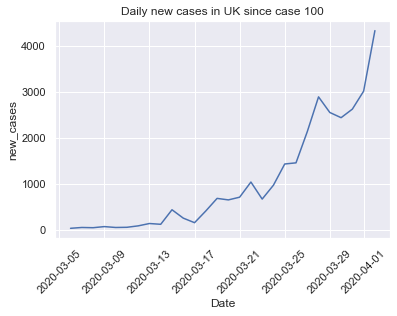

In [25]:
# plot new_cases by date

sns.set(style = "darkgrid")
fig = sns.lineplot(x = "Date", y = "new_cases", data = data)
plt.xticks(rotation = 45)
plt.title('Daily new cases in UK since case 100')

Text(0.5, 1.0, 'Daily new deaths in UK since case 100')

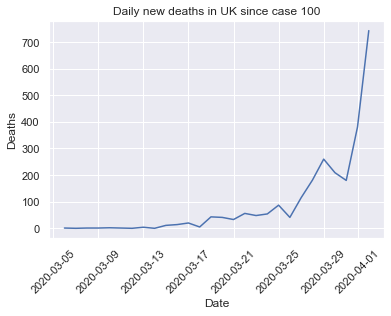

In [26]:
# plot deaths by date

sns.set(style = "darkgrid")
fig = sns.lineplot(x = "Date", y = "Deaths", data = data)
plt.xticks(rotation = 45)
plt.title('Daily new deaths in UK since case 100')